<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import pandas as pd

# Create synthetic regression dataset with 100 samples and 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y

print(df.head())


   Feature1  Feature2  Feature3     Target
0 -0.792521  0.504987 -0.114736  12.781276
1  0.280992 -0.208122 -0.622700 -21.876410
2  0.791032  1.402794 -0.909387  91.098757
3  0.625667 -1.070892 -0.857158 -82.265575
4 -0.342715 -0.161286 -0.802277 -30.416557


In [2]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with features and target
X = df.drop('Target', axis=1)  # features
y = df['Target']               # target variable

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on features and transform
X_scaled = scaler.fit_transform(X)

# Now, X_scaled is the scaled version of features and ready for KNN regression


In [3]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled and y are already defined
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 80
Testing samples: 20


K=1: MSE=1937.3224, R²=0.7188
K=2: MSE=1188.0236, R²=0.8276
K=3: MSE=890.3567, R²=0.8708
K=4: MSE=1128.5570, R²=0.8362
K=5: MSE=1393.0193, R²=0.7978
K=6: MSE=1436.8676, R²=0.7915
K=7: MSE=1637.0234, R²=0.7624
K=8: MSE=1747.1682, R²=0.7464
K=9: MSE=1770.2760, R²=0.7431
K=10: MSE=1725.1356, R²=0.7496
K=11: MSE=1807.5880, R²=0.7376
K=12: MSE=1876.0037, R²=0.7277
K=13: MSE=2051.3826, R²=0.7023
K=14: MSE=2184.2557, R²=0.6830
K=15: MSE=2272.0305, R²=0.6702
K=16: MSE=2299.6125, R²=0.6662
K=17: MSE=2419.8077, R²=0.6488
K=18: MSE=2413.9766, R²=0.6496
K=19: MSE=2456.8583, R²=0.6434
K=20: MSE=2544.5507, R²=0.6307


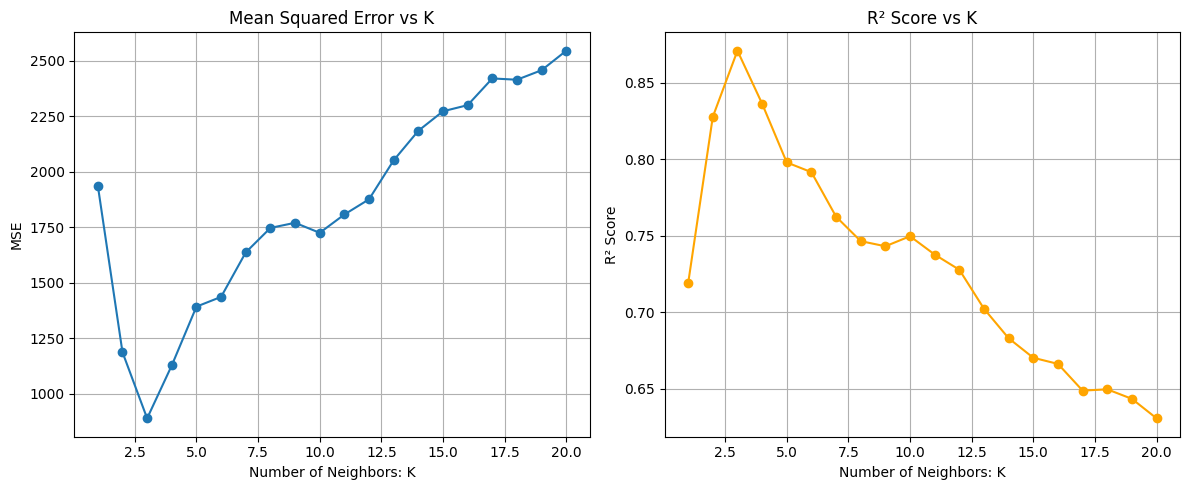

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse_scores = []
r2_scores = []
k_values = range(1, 21)  # K from 1 to 20

for k in k_values:
    # Initialize KNN regressor with k neighbors
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    knn_reg.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn_reg.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"K={k}: MSE={mse:.4f}, R²={r2:.4f}")

# Plot MSE and R² vs K
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o')
plt.title('Mean Squared Error vs K')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='orange')
plt.title('R² Score vs K')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()


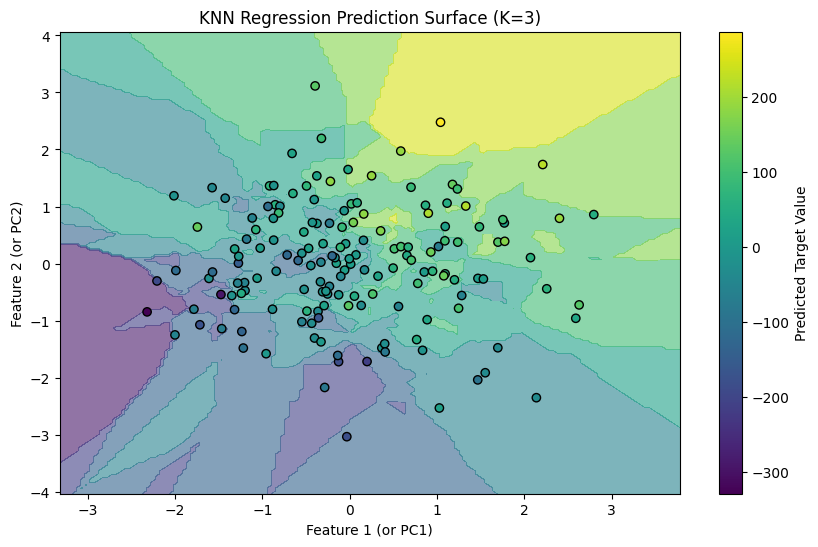

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
from matplotlib import cm

# Step 1: Reduce to 2D if necessary
if X_train.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
else:
    X_train_2d = X_train
    X_test_2d = X_test

# Step 2: Train KNN regressor on 2D data with optimal K
optimal_k = 3  # replace with your chosen K
knn_reg = KNeighborsRegressor(n_neighbors=optimal_k)
knn_reg.fit(X_train_2d, y_train)

# Step 3: Create meshgrid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Step 4: Predict on mesh grid points
Z = knn_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.6)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k')

plt.colorbar(label='Predicted Target Value')
plt.xlabel('Feature 1 (or PC1)')
plt.ylabel('Feature 2 (or PC2)')
plt.title(f'KNN Regression Prediction Surface (K={optimal_k})')
plt.show()


K=1, MSE=2098.8450
K=2, MSE=1728.0570
K=3, MSE=1646.6553
K=4, MSE=1675.5877
K=5, MSE=1708.0183
K=6, MSE=1786.9042
K=7, MSE=1768.2693
K=8, MSE=1901.5039
K=9, MSE=1930.5217
K=10, MSE=1968.4436
K=11, MSE=1999.0865
K=12, MSE=2148.7969
K=13, MSE=2210.4136
K=14, MSE=2279.0645
K=15, MSE=2373.8873
K=16, MSE=2509.2453
K=17, MSE=2497.1886
K=18, MSE=2472.0960
K=19, MSE=2577.4553
K=20, MSE=2669.3096

Best K found: 3


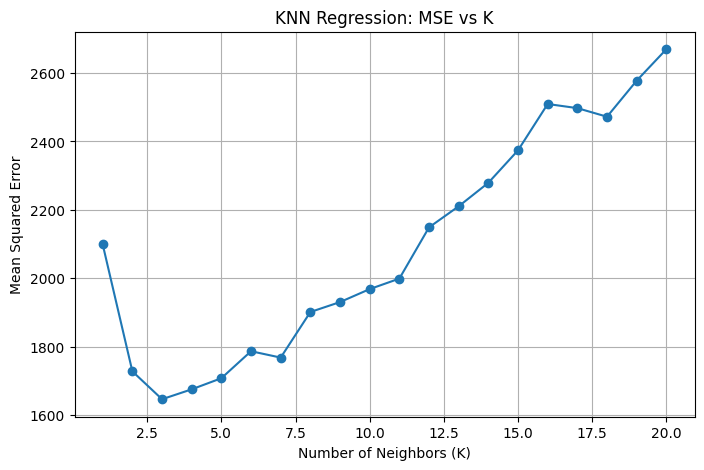

In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Try different K values and calculate MSE
mse_values = []

for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"K={k}, MSE={mse:.4f}")

# Step 5: Find best K (lowest MSE)
best_k = mse_values.index(min(mse_values)) + 1
print(f"\nBest K found: {best_k}")

# Step 6: Plot MSE vs K
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), mse_values, marker='o')
plt.title('KNN Regression: MSE vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppose best_k is the K with lowest test error found earlier
best_k = 3  # replace with your actual best K

# Train model with best K
knn_reg = KNeighborsRegressor(n_neighbors=best_k)
knn_reg.fit(X_train, y_train)

# Predict on test set
y_pred = knn_reg.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best K: {best_k}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")


Best K: 3
Mean Squared Error (MSE): 890.3567
Mean Absolute Error (MAE): 22.0323
R^2 Score: 0.8708
